# 1. Read all csv files with Sensor Data

In [12]:
import os
import pandas as pd
import numpy as np

In [2]:
# Set the path to your folder containing CSV files
folder_path = "/Users/jakobkuemmerle/Documents/CDL/API_AIR"

In [4]:
import os
import pandas as pd

# Initialize an empty list to store DataFrames
dfs = []

# List all CSV files in the specified folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Loop through each CSV file and append its data to the list of DataFrames
for csv_file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(os.path.join(folder_path, csv_file))

    # Add a new column with the file name (without .csv extension)
    df['sensor_id'] = os.path.splitext(csv_file)[0]

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
combined_df.head()

,time_stamp,humidity,temperature,pressure,pm2.5_alt,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count,pm1.0_atm,pm2.5_atm,pm2.5_cf_1,pm10.0_atm,sensor_id
0,2020-10-11,35.819,80.364,957.176,1.4,4.5,254.1,296.972,0.321,0.982,1.657,1.657,1.860,66849
1,2020-11-28,23.821,80.692,961.921,1.2,4.2,260.0,277.775,0.216,0.737,1.197,1.197,1.333,66849
2,2020-10-17,17.943,89.671,954.660,0.5,1.6,328.2,104.678,0.267,0.099,0.277,0.277,0.422,66849
3,2020-09-24,30.565,85.556,956.637,1.2,4.2,258.7,281.900,0.241,0.877,1.294,1.294,1.430,66849
4,2020-12-06,26.742,83.439,963.470,4.9,14.7,141.2,979.037,0.951,4.754,7.485,7.485,8.104,66849


# 2. Stats and decription

In [6]:
combined_df.describe()

,humidity,temperature,pressure,pm2.5_alt,scattering_coefficient,visual_range,0.3_um_count,5.0_um_count,pm1.0_atm,pm2.5_atm,pm2.5_cf_1,pm10.0_atm
count,15907.000000,1.590700e+04,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000,15907.000000
mean,33.787967,8.016228e+02,852.063536,7.015327,21.964003,188.938172,1464.285398,2.091181,9.782960,13.620003,17.982416,14.471795
std,14.525518,3.800057e+04,230.942710,24.782402,54.034309,87.080506,3602.278357,13.077422,77.070579,80.976023,121.391955,83.007394
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.967500,5.480000e+01,856.695500,1.200000,4.300000,125.200000,289.373250,0.297000,0.774000,1.306750,1.317250,1.435000
50%,32.629000,6.691600e+01,898.620000,2.400000,8.800000,190.100000,583.995500,0.533000,2.310000,3.507500,3.539500,3.758500
75%,43.599000,7.918450e+01,959.548000,4.800000,17.600000,256.400000,1175.083500,1.102250,5.277500,7.942750,8.153000,8.536250
max,100.000000,2.130508e+06,1021.832000,854.600000,972.500000,381.900000,64832.315000,625.403500,1815.447000,1816.865000,2723.638500,1817.453500


In [10]:
combined_df.shape

(15907, 14)

In [14]:
combined_df.dtypes

time_stamp                 object
humidity                  float64
temperature               float64
pressure                  float64
pm2.5_alt                 float64
scattering_coefficient    float64
visual_range              float64
0.3_um_count              float64
5.0_um_count              float64
pm1.0_atm                 float64
pm2.5_atm                 float64
pm2.5_cf_1                float64
pm10.0_atm                float64
sensor_id                  object
dtype: object

In [9]:
# Count the number of rows with value 0.000 for each column
zero_count_per_column = (combined_df == 0.000).sum()

# Display the result
print(zero_count_per_column)

time_stamp                   0
humidity                   527
temperature                527
pressure                  1014
pm2.5_alt                    2
scattering_coefficient       2
visual_range                 2
0.3_um_count                 2
5.0_um_count                 9
pm1.0_atm                   38
pm2.5_atm                    4
pm2.5_cf_1                   4
pm10.0_atm                   3
sensor_id                    0
dtype: int64


# Analyze Extreme Outliers

In [17]:
from scipy.stats import zscore

# Define a function to count extreme outliers using Z-score for specified columns
def count_outliers_zscore(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Count extreme outliers
    return (z_scores > 3).sum()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in combined_df.columns if col not in exclude_columns]

# Count extreme outliers for each selected column
outliers_count_zscore = combined_df[columns_for_outliers].apply(count_outliers_zscore)

# Display the result
print(outliers_count_zscore)


humidity                    19
temperature                  6
pressure                  1014
pm2.5_alt                  188
scattering_coefficient     306
visual_range                 0
0.3_um_count               306
5.0_um_count               110
pm1.0_atm                   51
pm2.5_atm                   92
pm2.5_cf_1                  93
pm10.0_atm                  99
dtype: int64


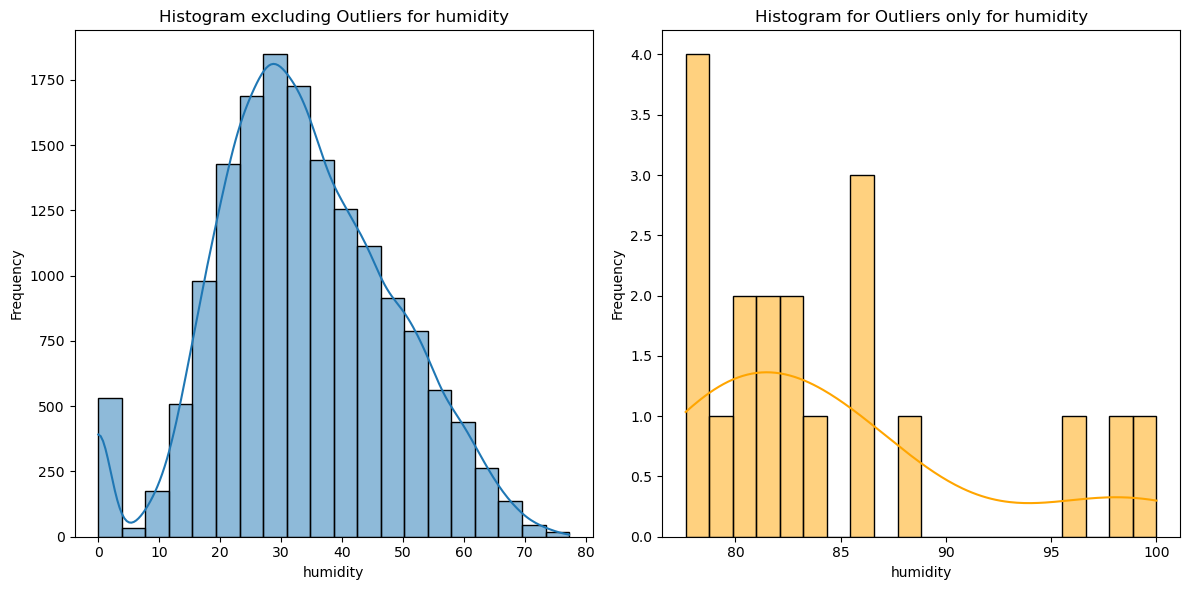

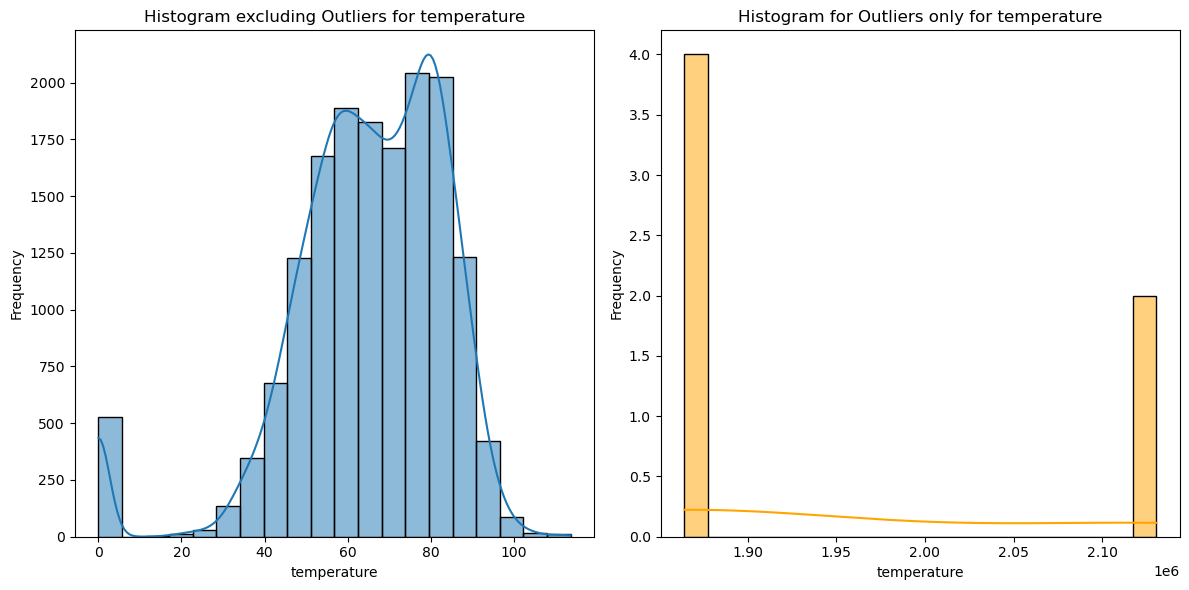

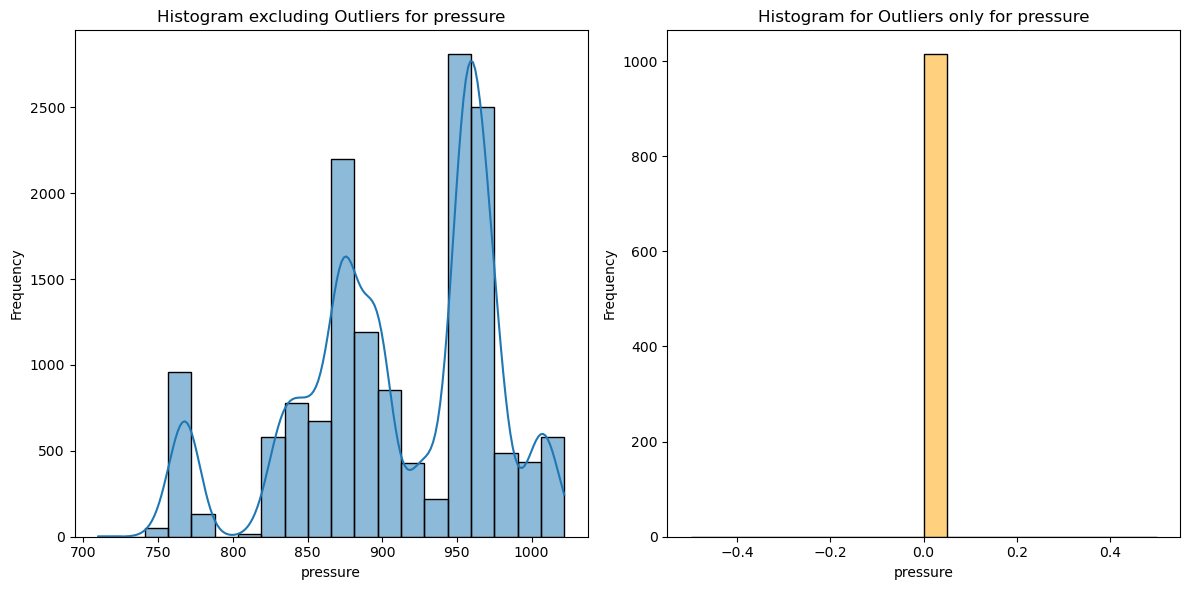

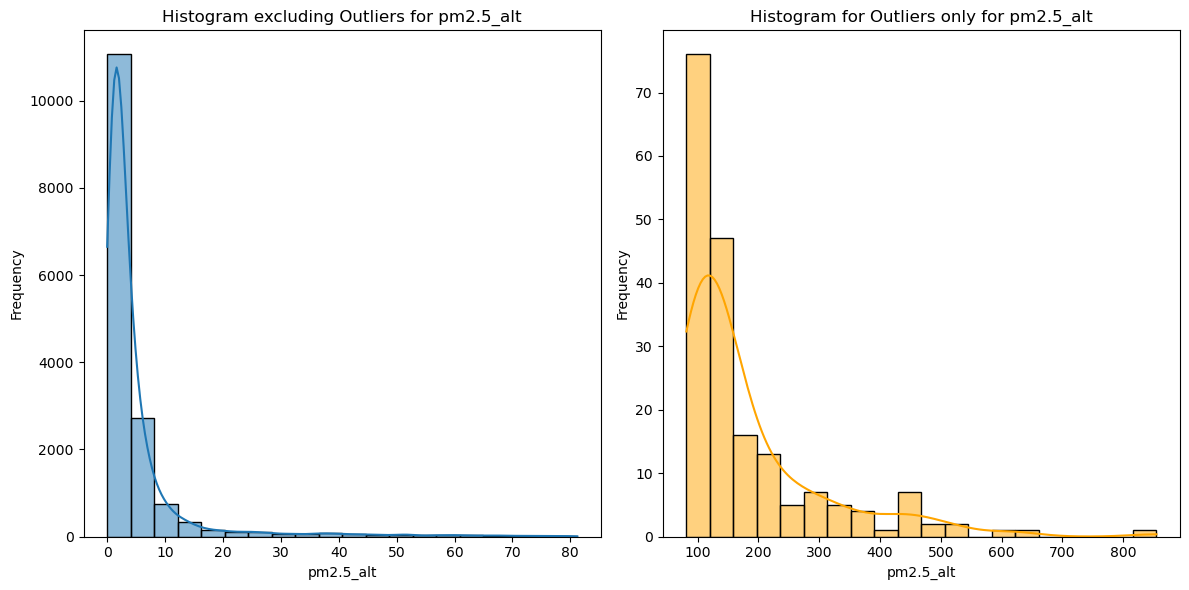

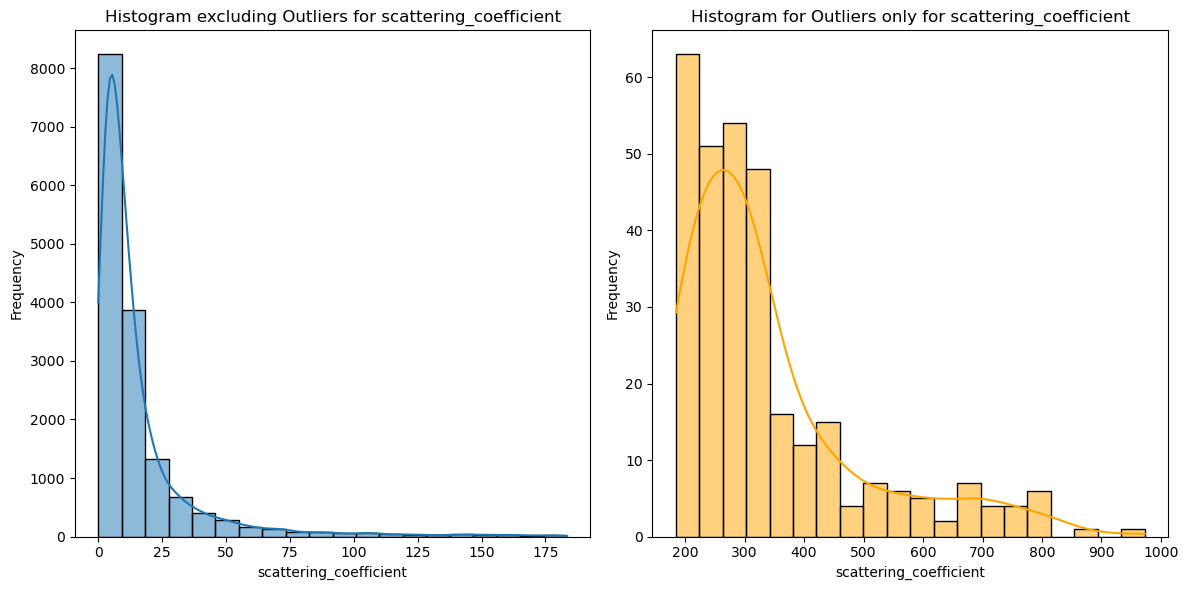

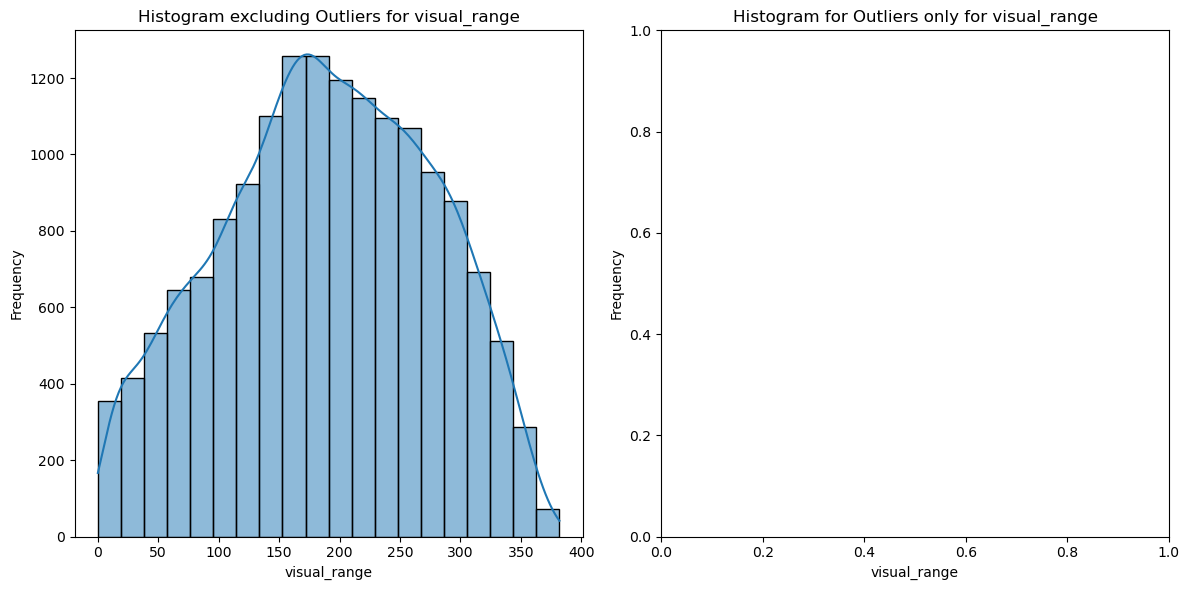

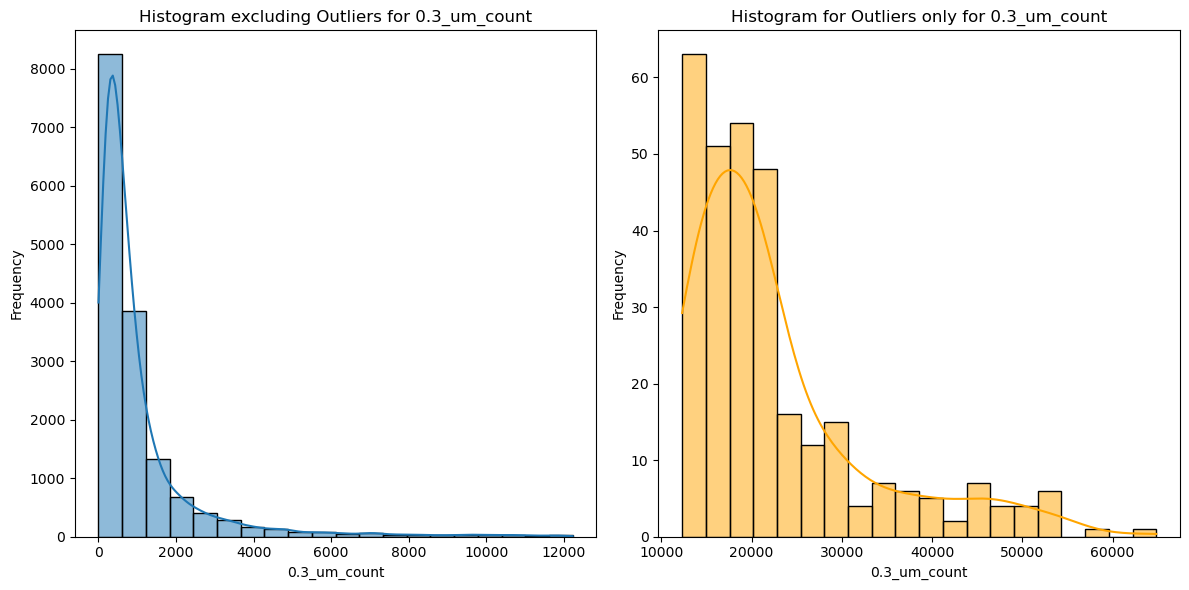

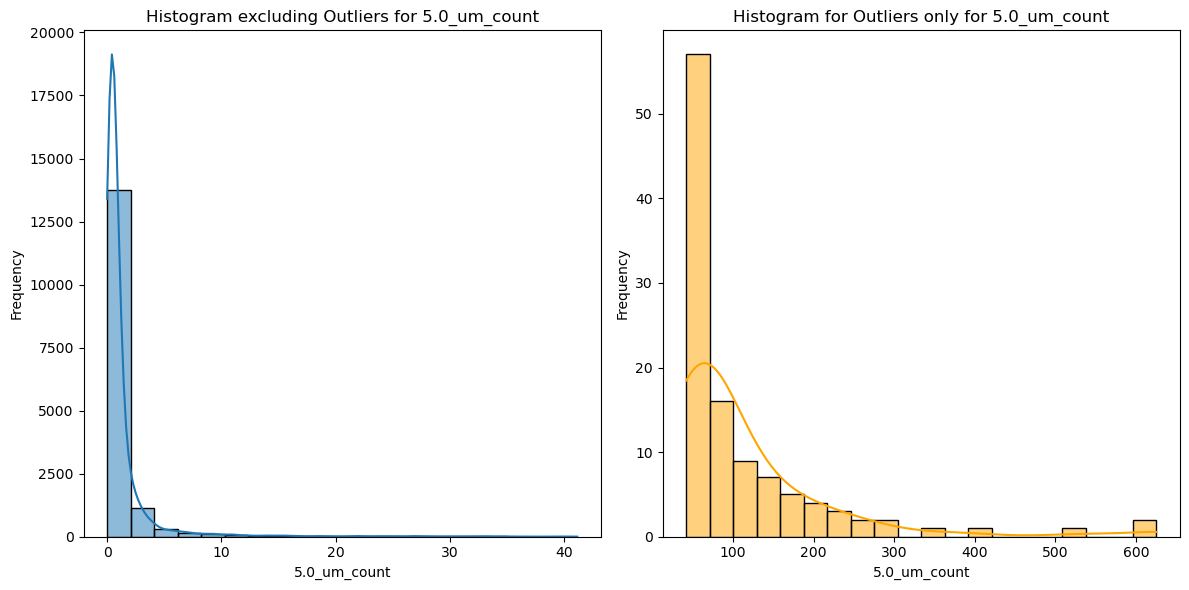

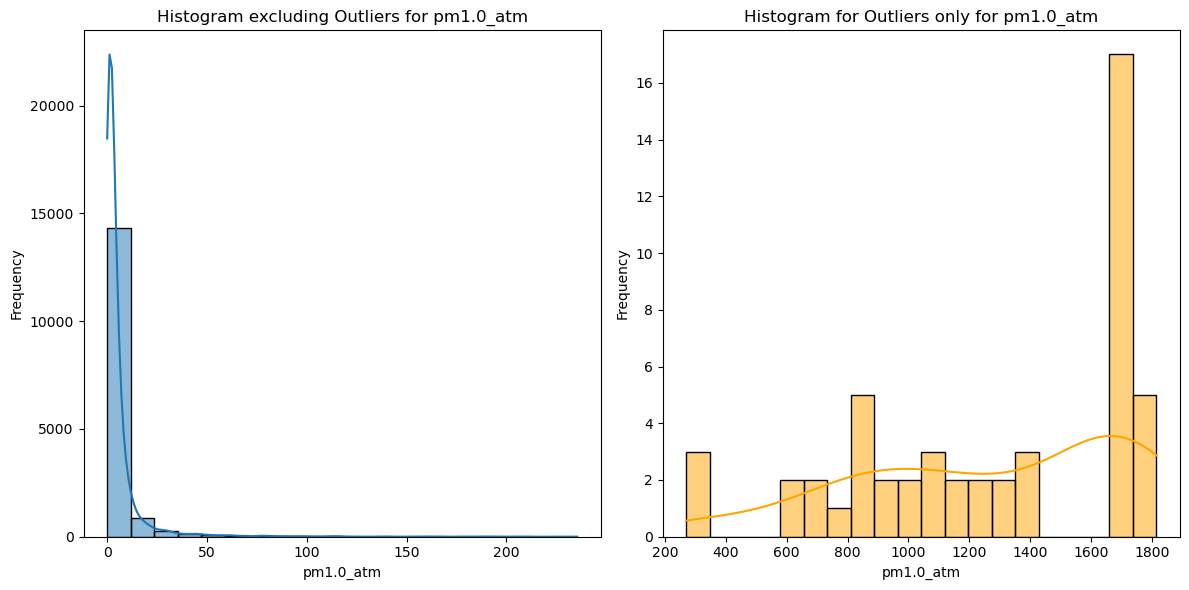

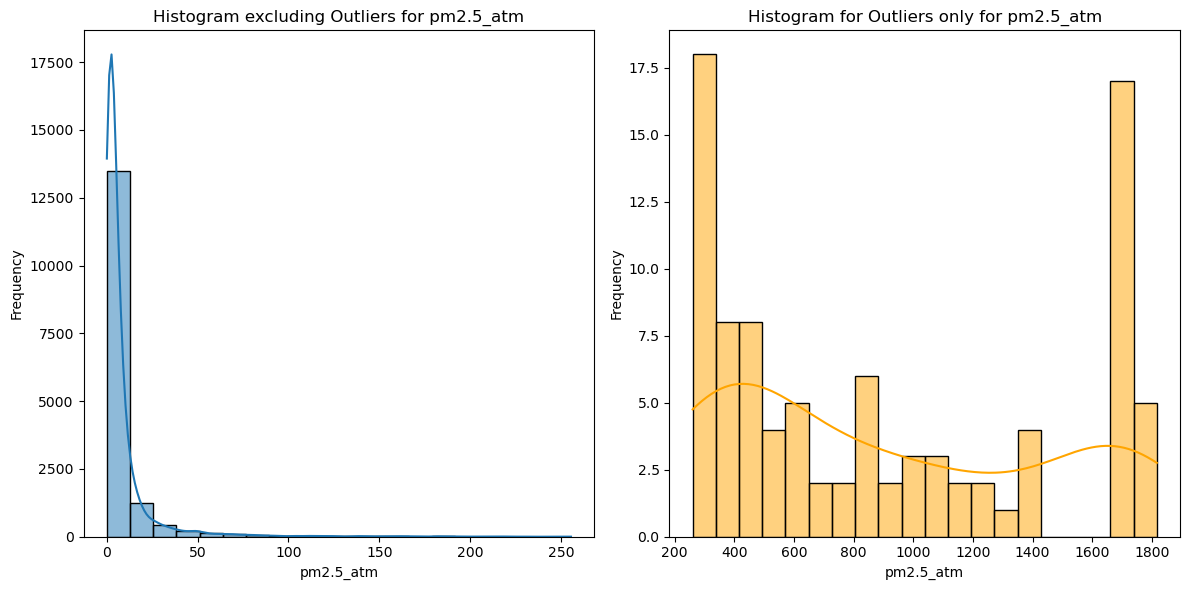

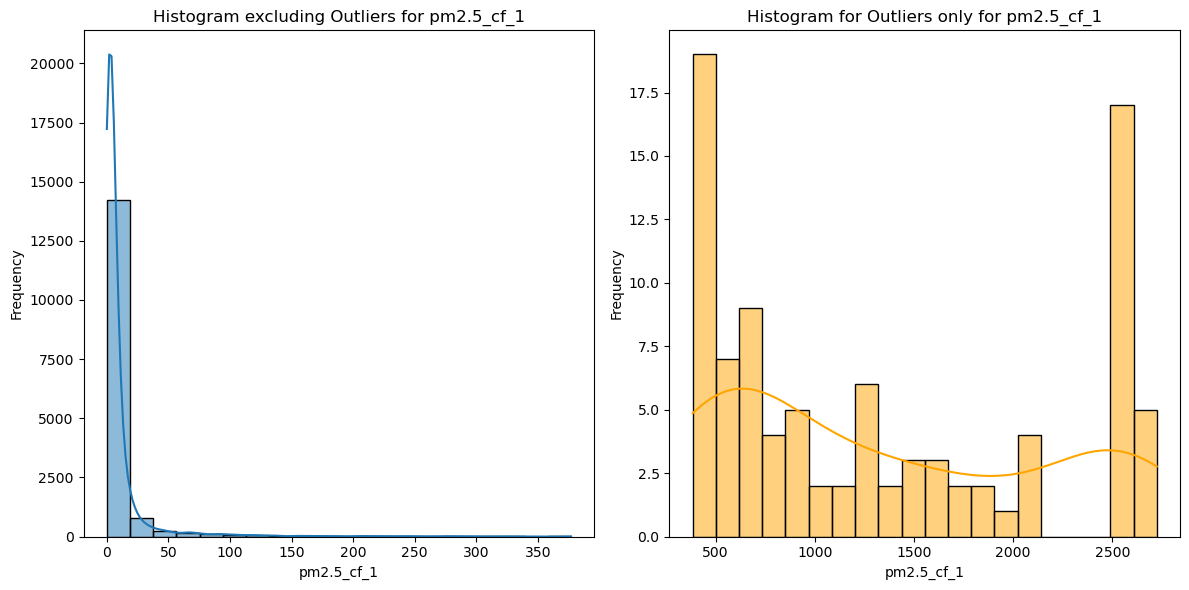

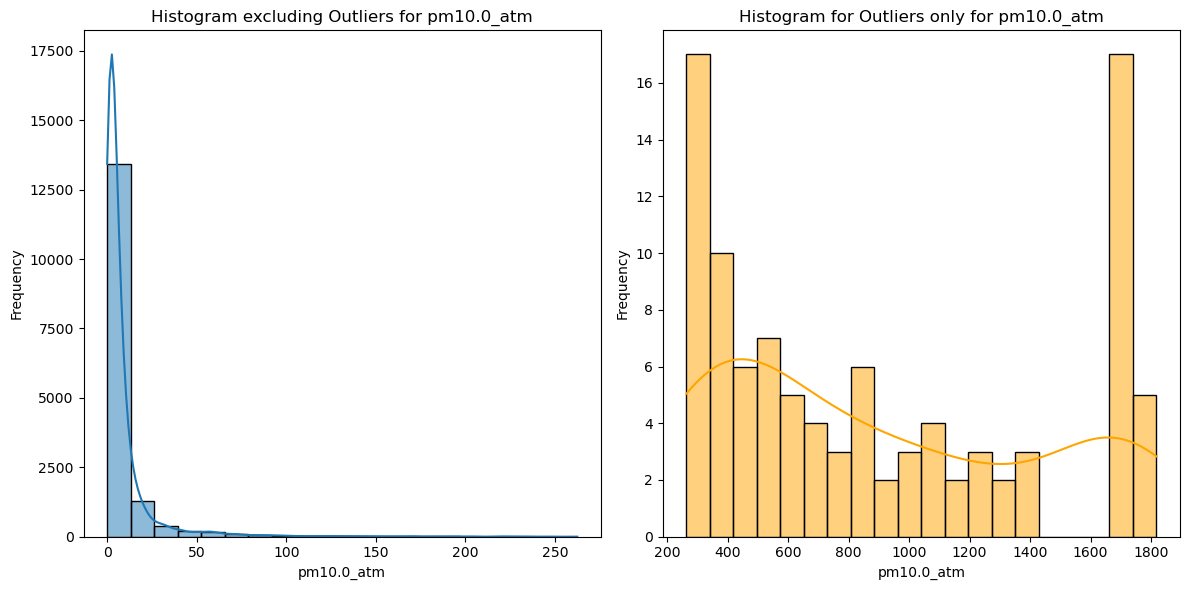

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings

# Suppress FutureWarnings from Seaborn
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define a function to create subplots for each column, showing histograms with and without outliers
def plot_combined_histograms(column):
    # Try to convert the column to numeric, ignoring errors
    numeric_column = pd.to_numeric(column, errors='coerce')
    
    # Calculate z-scores for the numeric column
    z_scores = np.abs(zscore(numeric_column))
    
    # Identify non-outliers and outliers
    non_outliers = numeric_column[z_scores <= 3]
    outliers = numeric_column[z_scores > 3]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plot histogram excluding outliers (left subplot)
    sns.histplot(non_outliers, bins=20, kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram excluding Outliers for {column.name}')
    axs[0].set_xlabel(column.name)
    axs[0].set_ylabel('Frequency')

    # Plot histogram for outliers only (right subplot)
    sns.histplot(outliers, bins=20, kde=True, ax=axs[1], color='orange')
    axs[1].set_title(f'Histogram for Outliers only for {column.name}')
    axs[1].set_xlabel(column.name)
    axs[1].set_ylabel('Frequency')

    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the combined visualization
    plt.show()

# List of columns to exclude
exclude_columns = ["time_stamp", "sensor_id"]

# Select columns for outlier detection (exclude specified columns)
columns_for_outliers = [col for col in combined_df.columns if col not in exclude_columns]

# Plot combined histograms for each selected column
for col in columns_for_outliers:
    plot_combined_histograms(combined_df[col])


# 3. Imputation?

- We need to handle the 0.000 values for pressure, humidity and temperature
- Air Quality Measure seem ok, don't exclude since they are the wildfire situation
- Extremely High Temp = Wildfire or error?

In [23]:
export_path = "/Users/jakobkuemmerle/Documents/CDL"

# Export the DataFrame to a CSV file
combined_df.to_csv(f"{export_path}/Sensor_Data_Cleaned.csv", index=False)